In [1]:
!pip install autoviml

     |████████████████████████████████| 125 kB 5.5 MB/s 
     |████████████████████████████████| 67.4 MB 28 kB/s 
     |████████████████████████████████| 23.1 MB 1.8 MB/s 
     |████████████████████████████████| 185 kB 30.3 MB/s 
     |████████████████████████████████| 356 kB 24.8 MB/s 
     |████████████████████████████████| 206 kB 42.5 MB/s 
     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 125 kB 48.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=ab9b1d1db012d451457ed0d9e02ff3dc45c70c0cfd56460237a68c0198fe8076
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for emoji: filename=emoji-1.5.0-py3-none-any.whl size=187457 sha256=ea5c700a0e0fb1ffdfa465c37b64409b8f98098d7e7586ac901d7ad3dd6bb350
  Stored in directory: /root/.cache/pip/wheels/db/b5/f6/b39abf14e94b3d6640613bbe630a66c10ccf7a12882d064fb5
Successfully bui

In [2]:
from autoviml.Auto_ViML import Auto_ViML
import pandas as pd
import os

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = 'gdrive/MyDrive/data/raifhack'

In [5]:
df = pd.read_csv(os.path.join(path, 'train.csv'))

In [9]:
test = pd.read_csv(os.path.join(path, 'test.csv'))

In [6]:
object_col = ['city', 'floor', 'id', 'lat', 'osm_city_nearest_name', 'region', 'street', 'date']
object_col

['city',
 'floor',
 'id',
 'lat',
 'osm_city_nearest_name',
 'region',
 'street',
 'date']

In [7]:
for col in object_col:
    df[col] = df[col].astype(str)

```
#Basic Example with all parameters
model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sample_submission,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)
```

- `train`: должен содержать местоположение вашего датасета или, если вы загрузили его в dataframe, то имя dataframe. В нашем случае мы загрузили его в dataframe с именем «df», поэтому мы дадим ему значение «df».
- `target`: содержит имя целевой переменной. В нашем случае она называется «TenYearCHD». 
- `test`: содержит тестовый датасет. Также мы можем оставить его пустым (и использовать ””), если у вас нет никакого тестового датасета, чтобы AutoVIML разделил датасет на обучающий и тестовый.
- `sample_submission`: мы оставим его пустым, чтобы он автоматически создавал представление в локальном каталоге.
- `hyper_param`: Мы будем использовать RandomizedSearchCV, потому что он в три раза быстрее, чем Grid Search CV. Дадим ему значение «RS».
- `feature_reduction`: Установим значение true, чтобы учитывать самую важную предикторную переменную для создания модели.
- `scoring_parameter`: вы можете задать свой собственный параметр для скоринга, либо он будет выбран в соответствии с моделью. Здесь мы используем «Weighted-f1».
- `KMeans_featurizer`: этот параметр должен стоять в значении true для линейного классификатора и false для XGboost или случайного классификатора, иначе есть риск переобучения.
- `boosting_flag`: используется для бустинга. Поставим значение false.
- `binning_flag`: по умолчанию стоит в значении false, но может быть установлен в true, когда мы хотим преобразовать верхние численные переменные в двоичные.
- `add_poly`: установим в false.
- `stacking_flag`: по умолчанию стоит в false. Если поставим значение true, то будет добавлена дополнительная функция, которая является производной от предсказаний другой модели. Оставим в значении false.
- `Imbalanced_flag`: если стоит значение true, то проверит данные на сбалансированность и уберет дисбаланс методом SMOTING.
- `Verbose`: обычно используется для вывода выполняемых шагов. Поставим значение 3.

https://habr.com/ru/company/otus/blog/525292/

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (279792, 77)
    Training Set Memory Usage = 164.37 MB
Single_Label Target: ['per_square_meter_price']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 279792 rows, 76 cols
Too many columns to print
    Numeric Columns: ['lng', 'osm_city_closest_dist', 'osm_city_nearest_population', 'osm_crossing_closest_dist', 'osm_subway_closest_dist', 'osm_train_stop_closest_dist', 'osm_transport_stop_closest_dist', 'reform_house_population_1000', 'reform_house_population_500', 'reform_mean_floor_count_1000', 'reform_mean_floor_count_500', 'reform_mean_year_building_1000', 'reform_mean_year

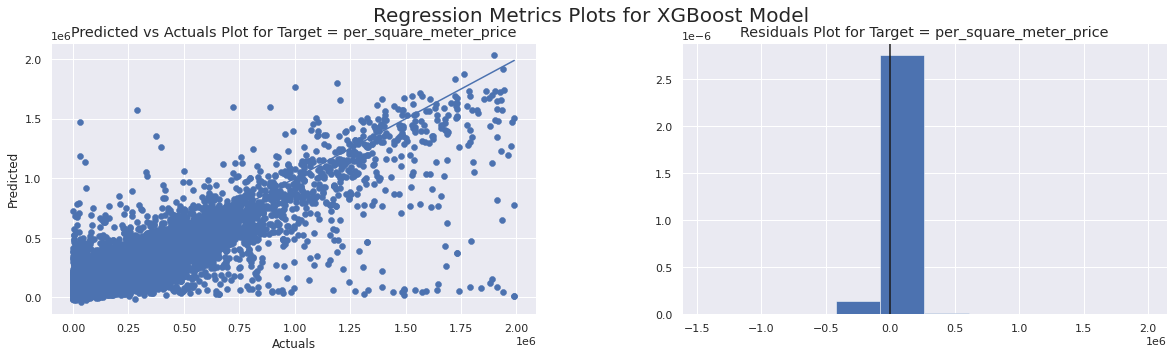

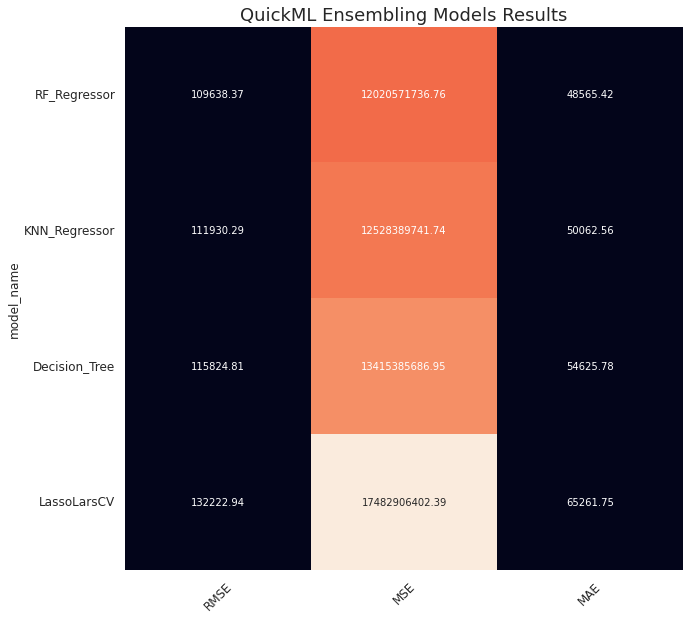

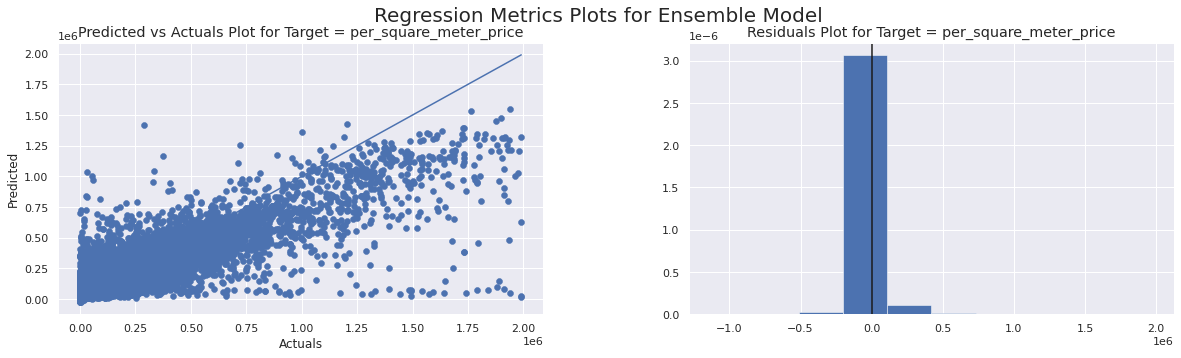

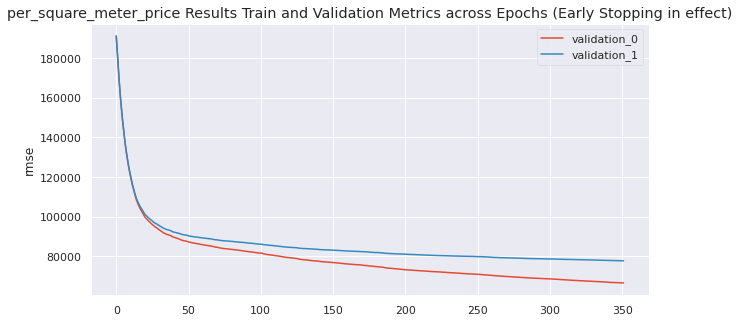

    Time taken for this Target (in seconds) = 3121
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 15
Training of models completed. Now starting predictions on test data...
Since there is no Test file, we will do a final prediction on Train itself as return it as testm dataframe
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


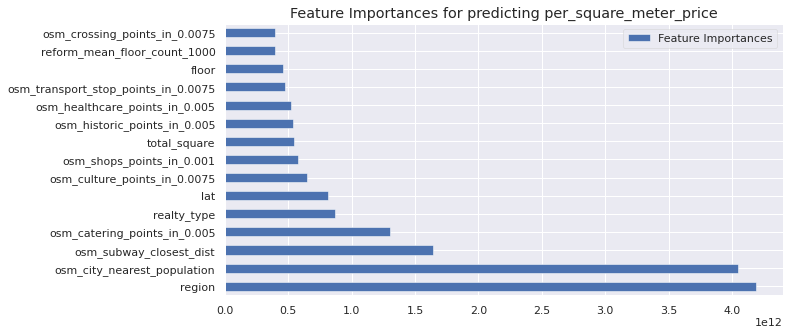

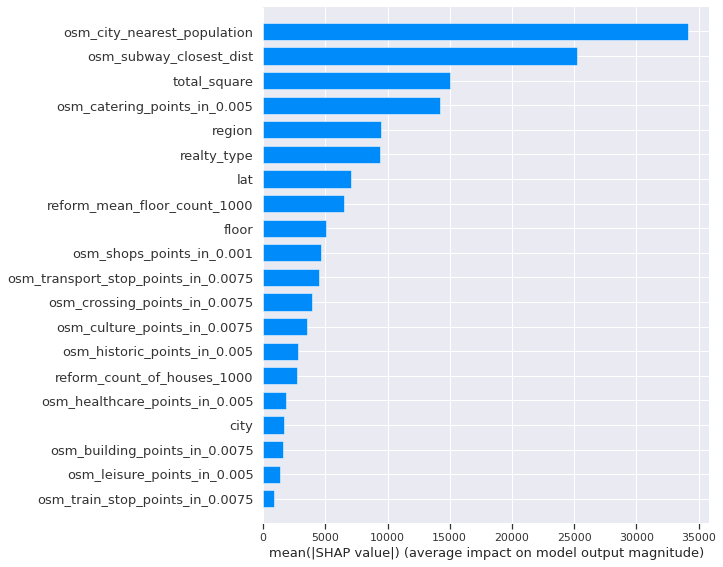

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 4175
Writing Output files to disk...
    Saving predictions to ./per_square_meter_price/per_square_meter_price_Regression_test_modified.csv
    Saving predictions to ./per_square_meter_price/per_square_meter_price_Regression_submission.csv
    Saving predictions to ./per_square_meter_price/per_square_meter_price_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 69.9 for the Entire Process


In [8]:
%%time
model, features, trainm, testm = Auto_ViML(
    train=df,
    target='per_square_meter_price',
    test='',
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=2
)